In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_dir = Path("/home/nadav2/dev/data/CLIP2Shape/outs/sliders_vs_blendshapes/images_to_fit")
working_dir = Path("/home/nadav2/dev/data/CLIP2Shape/outs/sliders_vs_blendshapes/smplx_male")

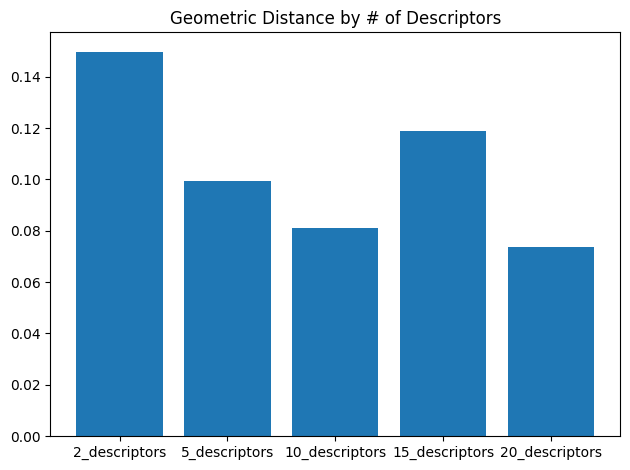

In [71]:
data_summary = {}
for img_id in data_dir.rglob("*.png"):
    img_id = img_id.stem
    data_summary[img_id] = {}
    for file in working_dir.rglob(f"{img_id}.txt"):
        with open(file, "r") as f:
            data = f.read()
        lines = data.splitlines()
        idx = 4 if lines[4].split(": ")[0] == "num_steps" else 5
        data_summary[img_id][file.parent.stem] = {"geo_dist": float(lines[0].split(": ")[-1])}#, "num_steps": int(lines[idx].split(": ")[-1])}

# for each descriptor, sum the geo_dist for all images
geo_dist = {}
for img_id in data_summary:
    for desc in data_summary[img_id]:
        if desc not in geo_dist:
            geo_dist[desc] = []
        geo_dist[desc].append(data_summary[img_id][desc]["geo_dist"])
geo_dist = {k: geo_dist[k] for k in ["2_descriptors", "5_descriptors", "10_descriptors", "15_descriptors", "20_descriptors"]}
for desc in geo_dist:
    geo_dist[desc] = np.array(geo_dist[desc]).sum()

# plot
plt.bar(geo_dist.keys(), geo_dist.values())
plt.title("Geometric Distance by # of Descriptors")
plt.tight_layout()

plt.savefig("/home/nadav2/dev/data/CLIP2Shape/images/supplementary_material/plots/geo_dist_by_num_descriptors.png")

In [65]:
geo_dist

{10: [0.00602303072810173],
 5: [0.011909033171832561],
 20: [0.004162417724728584],
 15: [0.005578628275543451],
 2: [0.006335235200822353]}

In [67]:
# sort dict key by [2_descriptors, 5_descriptors, 10_descriptors, 15_descriptors, 20_descriptors]
geo_dist

{'2_descriptors': 0.14981933496892452,
 '5_descriptors': 0.09940486121922731,
 '10_descriptors': 0.0812012804672122,
 '15_descriptors': 0.11889787949621677,
 '20_descriptors': 0.07365688239224255}

In [61]:
sorted(geo_dist)

['10_descriptors',
 '15_descriptors',
 '20_descriptors',
 '2_descriptors',
 '5_descriptors']